In [34]:
import requests
import matplotlib.pyplot as plt
import datetime

In [43]:
# не больше, чем дата, заданная в generator.py
from_time_obj = datetime.datetime.strptime('2024.01.01 12:00:00', '%Y.%m.%d %H:%M:%S')
to_time_obj = datetime.datetime.strptime('2024.01.01 13:00:00', '%Y.%m.%d %H:%M:%S')

from_time = int(from_time_obj.timestamp())
to_time = int(to_time_obj.timestamp())

14130
0.49341845902381465


/var/folders/_m/98rglg2j2yj6gclv62v69t7w0000gn/T/ipykernel_40389/2981214956.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


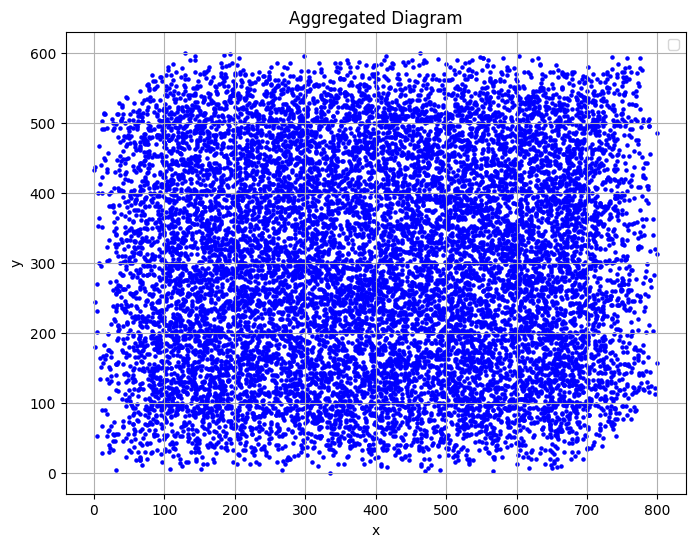

In [44]:
res = requests.get(f'http://localhost:8000/diagram/aggregate?from_time={from_time}&to_time={to_time}&canvas_width=800&canvas_height=600')
res = res.json()
print
if ('error' in res): print(res)
else:
    print(len(res['records']))
    print(res['query_execution_time'])

    x = [record['pixel_x'] for record in res['records']]
    y = [record['pixel_y'] for record in res['records']]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='o', s=5, color='b')
    plt.title('Aggregated Diagram')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

14404
0.1719940000330098


/var/folders/_m/98rglg2j2yj6gclv62v69t7w0000gn/T/ipykernel_40389/3743437720.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


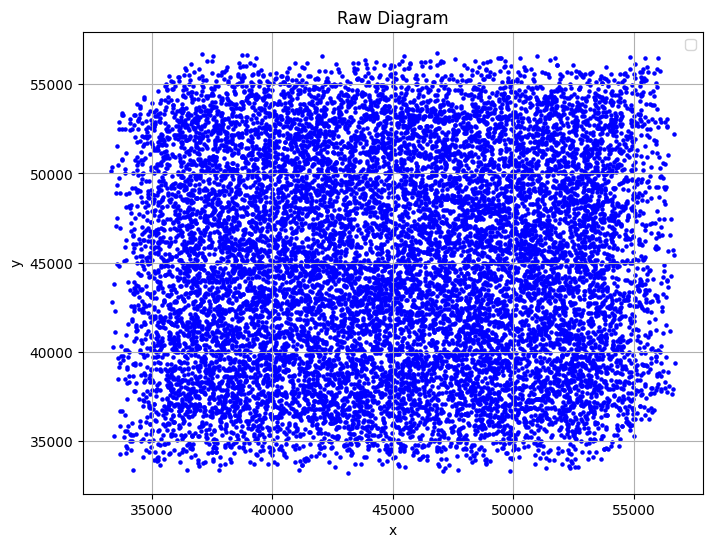

In [45]:
res = requests.get(f'http://localhost:8000/diagram?from_time={from_time}&to_time={to_time}')
res = res.json()

print(len(res['records']))
print(res['query_execution_time'])

x = [record['x'] for record in res['records']]
y = [record['y'] for record in res['records']]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, marker='o', s=5, color='b')
plt.title('Raw Diagram')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()